In [53]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [54]:
np.random.seed(11)
digits = pd.read_csv("mnist_train.csv", header=None)

column_names = ["label"] + ['p' + str(i) for i in range(digits.shape[1] - 1)]
digits.columns = column_names

digits.head()


,label,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p774,p775,p776,p777,p778,p779,p780,p781,p782,p783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
from sklearn.preprocessing import LabelBinarizer

X = digits.drop(columns=['label'])
y = digits['label']
print(X.head())
print(y.head())

X_n = X / 255.0  # Max normalizing

lb = LabelBinarizer()
y_n = lb.fit_transform(y)

   p0  p1  p2  p3  p4  p5  p6  p7  p8  p9  ...  p774  p775  p776  p777  p778  \
0   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
1   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
2   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
3   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
4   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   

   p779  p780  p781  p782  p783  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 784 columns]
0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64


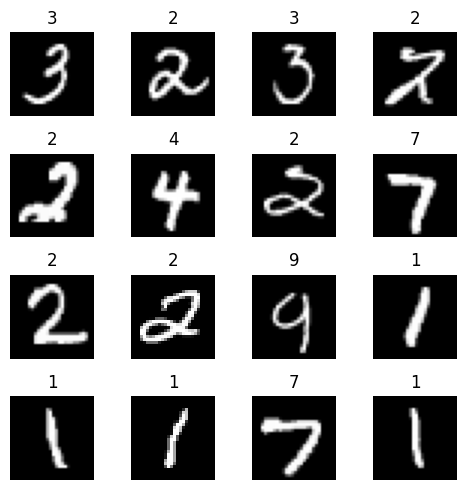

In [80]:
np.random.seed(11)
fig, axes = plt.subplots(4, 4, figsize=(5, 5))
for _, ax in enumerate(axes.flat):
    i = np.random.randint(digits.shape[0])
    img = X.iloc[i].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(y.iloc[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [89]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
}

histories = {}
models = {}

def create_model(optimizer):
    model = Sequential([
        Dense(units=128, activation='relu', input_shape=(X_n.shape[1],)),
        Dense(units=64, activation='relu'),
        Dense(units=10, activation='softmax'),
    ])
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

for name, optimizer in optimizers.items():
    print(f'Training with {name} optimizer...')
    np.random.seed(42)
    tf.random.set_seed(42)
    model = create_model(optimizer)
    history = model.fit(X_n, y_n, epochs=50, validation_split=0.2, callbacks=[early_stopping])
    models[name] = model
    histories[name] = history.history


Training with SGD optimizer...


c:\GWay\AI\numClassifier\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6690 - loss: 1.1765 - val_accuracy: 0.9047 - val_loss: 0.3417
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9038 - loss: 0.3407 - val_accuracy: 0.9197 - val_loss: 0.2764
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9207 - loss: 0.2803 - val_accuracy: 0.9288 - val_loss: 0.2418
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9293 - loss: 0.2438 - val_accuracy: 0.9377 - val_loss: 0.2168
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9371 - loss: 0.2158 - val_accuracy: 0.9450 - val_loss: 0.1968
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9431 - loss: 0.1930 - val_accuracy: 0.9491 - val_loss: 0.1804
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9484 - loss: 0.1741 - val_accuracy: 0.9539 - val_loss: 0.1672
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9536 - loss: 0.1582 - 

In [58]:
test_digits = pd.read_csv("mnist_test.csv", header=None)
test_digits.columns = column_names

test_digits.head()
X_test = test_digits.drop(columns=['label'])
y_test = test_digits['label']

print(X_test.head())
print(y_test.head())


   p0  p1  p2  p3  p4  p5  p6  p7  p8  p9  ...  p774  p775  p776  p777  p778  \
0   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
1   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
2   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
3   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
4   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   

   p779  p780  p781  p782  p783  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 784 columns]
0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64


In [ ]:
# X_test_n = X_test / 255.0
# test_lb = LabelBinarizer()

# y_test_lb = test_lb.fit_transform(y_test)

# predictions = model_relu.predict(X_test_n)

# predicted_labels = np.argmax(predictions, axis=1)  # returns index of max values comparing across axis 1 (columns), ie on each row
# predicted_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# fig, axes = plt.subplots(4, 4, figsize=(4, 4))
# for _, ax in enumerate(axes.flat):
#     i = np.random.randint(X_test.shape[0])
#     img = X_test.iloc[i].values.reshape(28, 28)
#     ax.imshow(img, cmap='gray')
#     ax.set_title(f'A:{y_test[i]}, P:{predicted_labels[i]}', fontsize=10)  # actual, predicted
#     ax.axis('off')

# plt.tight_layout()
# plt.show()


NameError: name 'plt' is not defined

In [78]:
for name, optimizer in optimizers.items():
    loss, accuracy = models[name].evaluate(X_test_n, y_test_lb)
    print(f'{name} Test accuracy: {accuracy * 100:.2f} %')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0986
SGD Test accuracy: 97.52 %
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.1137
Adam Test accuracy: 97.62 %
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1154
RMSprop Test accuracy: 97.06 %
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2262
Adagrad Test accuracy: 94.30 %


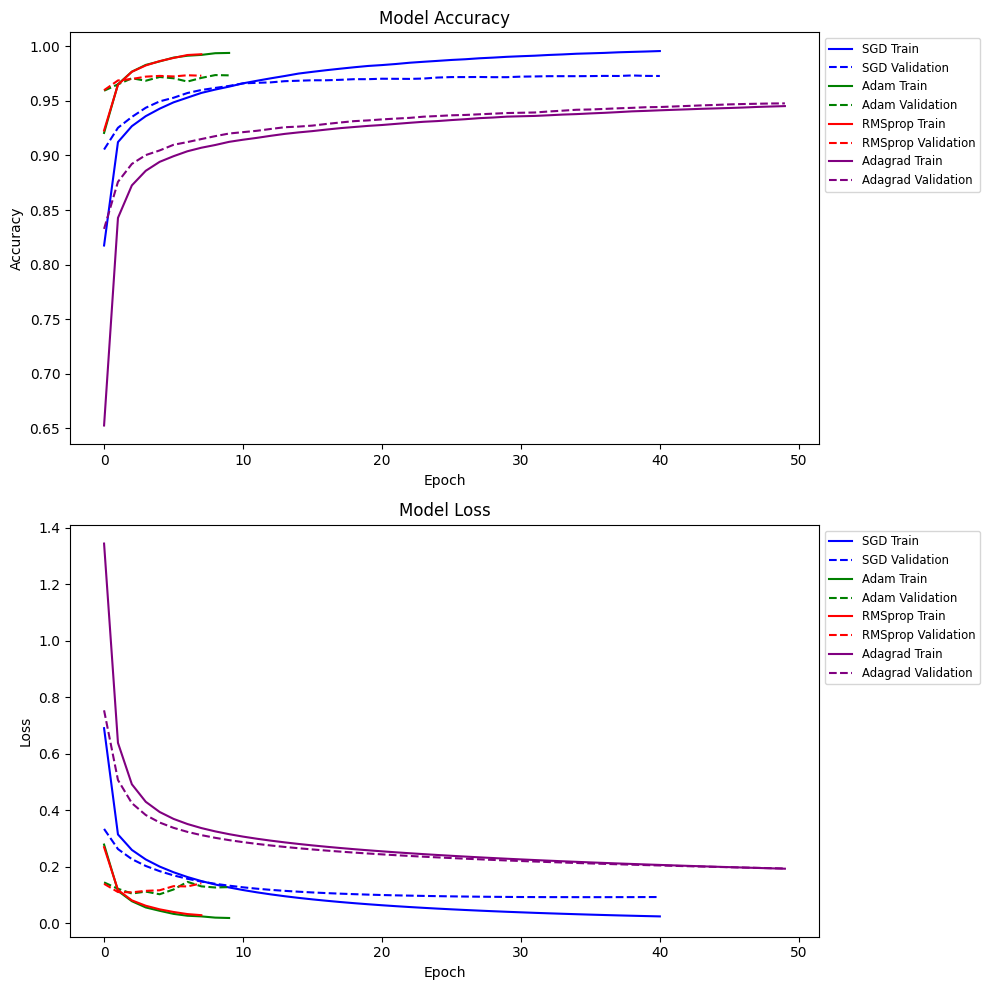

In [88]:

colors = {
    'SGD': 'blue',
    'Adam': 'green',
    'RMSprop': 'red',
    'Adagrad': 'purple'
}

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train', linestyle='-', color=colors[name])
    plt.plot(history['val_accuracy'], label=f'{name} Validation', linestyle='--', color=colors[name])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.subplot(2, 1, 2)
for name, history in histories.items():
    plt.plot(history['loss'], label=f'{name} Train', linestyle='-', color=colors[name])
    plt.plot(history['val_loss'], label=f'{name} Validation', linestyle='--', color=colors[name])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.tight_layout()
plt.show()

In [92]:
learning_rates = [0.001, 0.01, 0.1, 0.3]
histories_del_lr = {}
models_del_lr = {}


for lr in learning_rates:
    print(f'Training with learning rate: {lr}')
    optimizer = SGD(learning_rate=lr)
    model = create_model(optimizer)
    history = model.fit(X_n, y_n, epochs=50, validation_split=0.2, callbacks=[early_stopping])
    models_del_lr[lr] = model
    histories_del_lr[lr] = history.history


Training with learning rate: 0.001
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2803 - loss: 2.1544 - val_accuracy: 0.6965 - val_loss: 1.5325
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7201 - loss: 1.3481 - val_accuracy: 0.8225 - val_loss: 0.8647
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8181 - loss: 0.8131 - val_accuracy: 0.8598 - val_loss: 0.6091
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8512 - loss: 0.6066 - val_accuracy: 0.8756 - val_loss: 0.4992
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8682 - loss: 0.5106 - val_accuracy: 0.8864 - val_loss: 0.4393
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8795 - loss: 0.4552 - val_accuracy: 0.8934 - val_loss: 0.4014
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8865 - loss: 0.4187 - val_accuracy: 0.8990 - val_loss: 0.3750
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step 

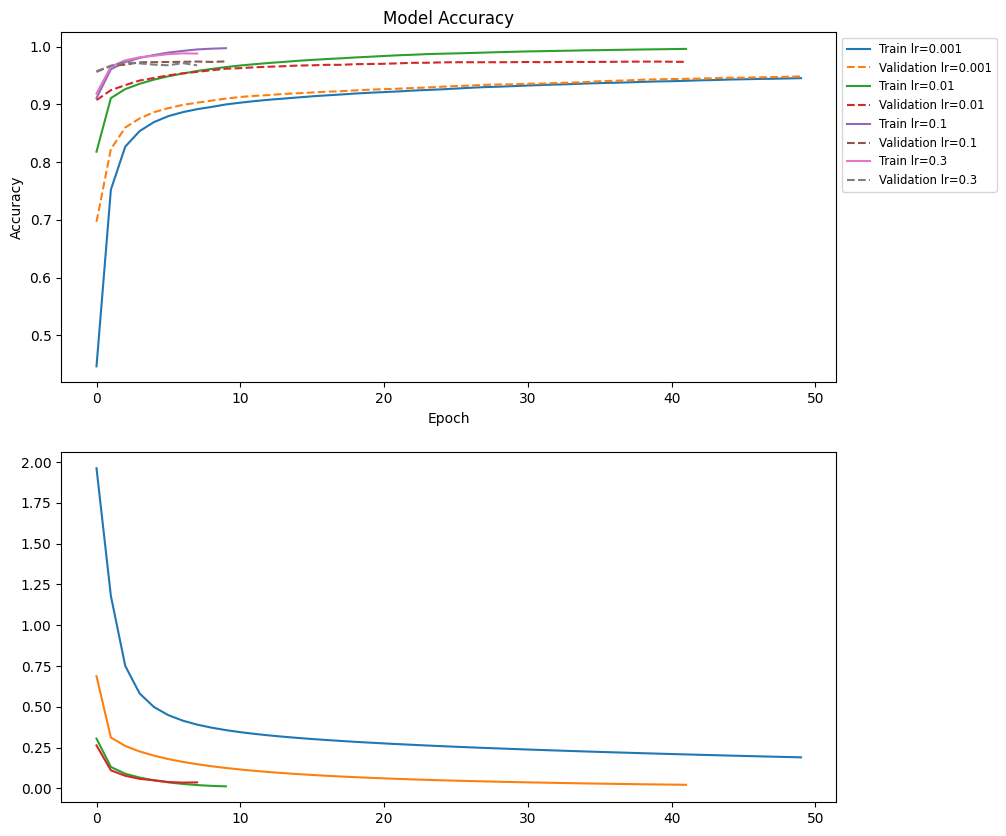

In [93]:

# Plot the performance for different learning rates
plt.figure(figsize=(10, 10))

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)
for lr, history in histories_del_lr.items():
    plt.plot(history['accuracy'], label=f'Train lr={lr}', linestyle='-')
    plt.plot(history['val_accuracy'], label=f'Validation lr={lr}', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
for lr, history in histories_del_lr.items():
    plt.plot(history['loss'], label=f'Train lr={lr}', linestyle='-')